In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering

In [2]:
X_s, labels_s, = make_blobs(
    [200, 200],
    2,
    centers = [(4,4), (1, 1)],
    cluster_std=[0.65, 0.65],
    random_state=42
)

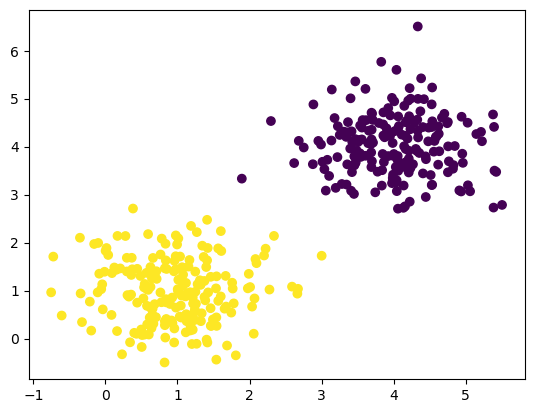

In [3]:
plt.scatter(X_s[:, 0], X_s[:, 1], c=labels_s)

In [4]:
def make_square_blobs(n_samples, centers, side=1, random_state=None, jitter=0.0, weights=None):
    #TODO: revise code generated by gpt, move it to another file
    """
    Centers: list of (x, y)
    side: side length of each square
    jitter: optional Gaussian noise to soften hard edges
    weights: optional class weights for uneven sizes
    """
    rng = np.random.default_rng(random_state)
    k = len(centers)

    if weights is None:
        counts = np.full(k, n_samples // k)
        counts[:n_samples - counts.sum()] += 1
    else:
        weights = np.asarray(weights) / np.sum(weights)
        counts = rng.multinomial(n_samples, weights)

    half = side / 2
    X_list, y_list = [], []
    for i, (cx, cy) in enumerate(centers):
        pts = rng.uniform(-half, half, size=(counts[i], 2)) + (cx, cy)
        if jitter > 0:
            pts += rng.normal(scale=jitter, size=pts.shape)
        X_list.append(pts)
        y_list.append(np.full(counts[i], i))
    return np.vstack(X_list), np.concatenate(y_list)

In [5]:
X_squares, label_squares = make_square_blobs(400, [(0.5, 4.5), (4.5, 0.5)], side=1.75)

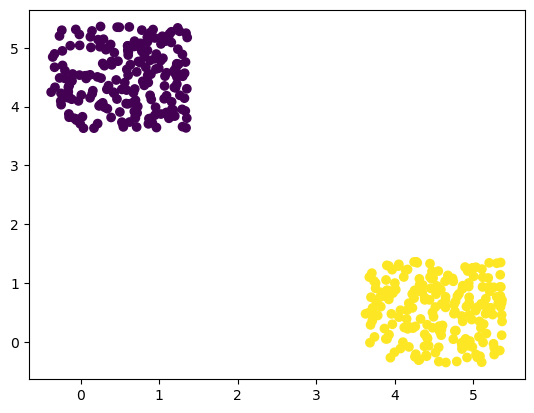

In [6]:
plt.scatter(X_squares[:, 0], X_squares[:, 1], c=label_squares)

In [7]:
X = np.vstack((X_s, X_squares))
y = np.vstack((labels_s, label_squares+2))

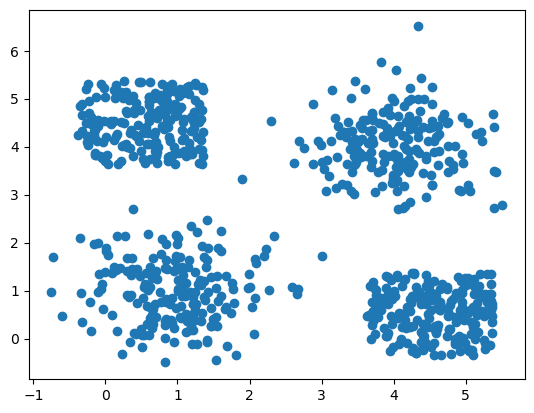

In [8]:
plt.scatter(X[:, 0], X[:, 1])

## use code i wrote

In [29]:
from spectral_clustering import SpectralClustering
from svd_spectral_clustering import SVD_SpectralClustering

sigma = 1.75
def normal_similarity(X, Y):
    return np.exp(np.linalg.norm(X-Y, 2) / (2*sigma)**2)

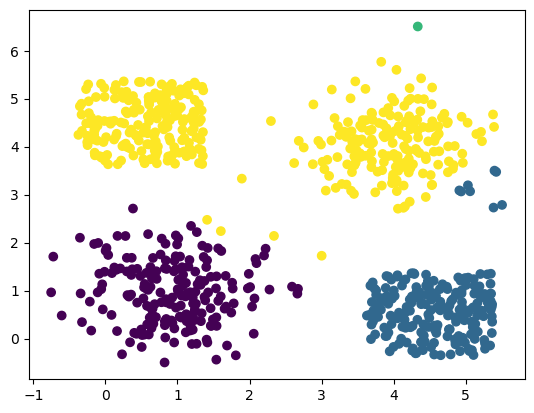

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=SpectralClustering(4, normal_similarity).fit_predict(X))

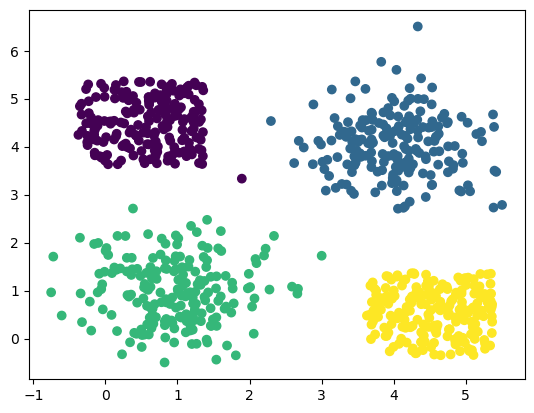

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=SVD_SpectralClustering(4, 4, normal_similarity).fit_predict(X))

In [33]:
U, S, Vh = SVD_SpectralClustering(4, 4, normal_similarity).get_similarity_svd(X)

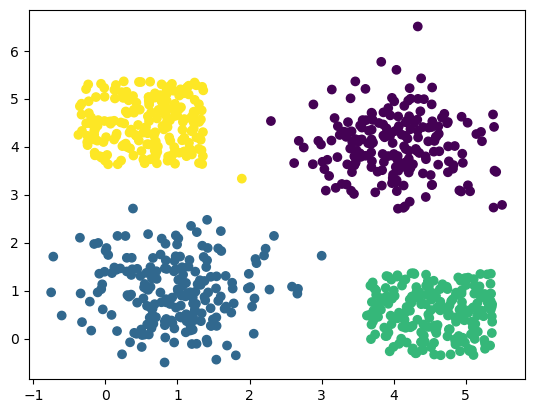

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=SVD_SpectralClustering(4, 4, normal_similarity).fit_predict(X))